####**Noted:**
Please run this code **nltk.download('all')** after import all of the library

In [14]:
import pandas as pd
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [8]:
data = pd.read_csv('https://drive.google.com/uc?id=1ogkVzRs9HptE5nY1dyiQUnB4DsBlFswS')
data.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


clean_text       0
is_depression    0
dtype: int64
(7731, 2)



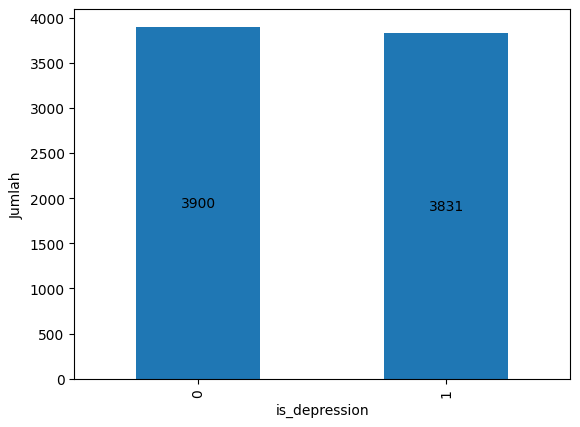

In [4]:
print(data.isna().sum())
print(f'{data.shape}\n')

ax = data['is_depression'].value_counts().plot.bar()
ax.set_ylabel('Jumlah')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width/2, y + height/2), ha='center', va='center')

In [5]:
text = list(data['clean_text'])
lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(len(text)):
    r = re.sub(r'[^a-zA-Z0-9 \s]', '', text[i])
    r = re.sub(r'\s+', ' ', r)
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [9]:
data['clean_text'] = corpus
data.head()

,clean_text,is_depression
0,understand people reply immediately op invitat...,1
1,welcome r depression check post place take mom...,1
2,anyone else instead sleeping depressed stay ni...,1
3,kind stuffed around lot life delaying inevitab...,1
4,sleep greatest comforting escape whenever wake...,1


In [10]:
# Create Feature and Label sets
X = data['clean_text']
y = data['is_depression']

# Train-test split (66% train - 33% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Print shape
print('Training Data :', X_train.shape)
print('Testing Data  :', X_test.shape)

Training Data : (6184,)
Testing Data  : (1547,)


In [12]:
tfidf = TfidfVectorizer(max_features=5000)
tfidf.fit(corpus['clean_text'])
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [16]:
SVM = svm.SVC(C=1.0, kernel='linear', gamma='auto', probability=True)
SVM.fit(X_train_tfidf,y_train)

y_pred_prob = SVM.predict_proba(X_test_tfidf)[:, 1]
predictions = SVM.predict(X_test_tfidf)

In [17]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
auroc = roc_auc_score(y_test, y_pred_prob)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUROC: {auroc}")

Precision: 0.975609756097561
Recall: 0.9399477806788512
AUROC: 0.9914550201756467


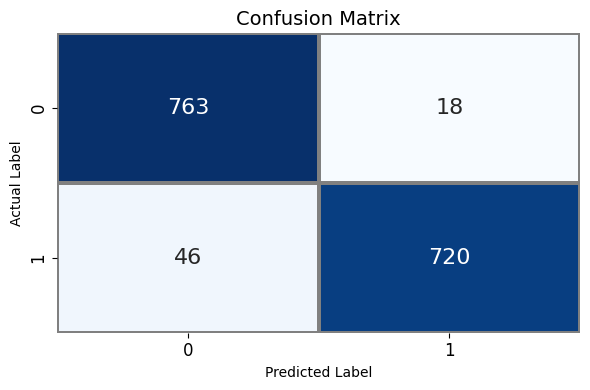

In [18]:
cm = metrics.confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(cm)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 16}, linewidths=1.5, linecolor='gray')

plt.title("Confusion Matrix", fontsize=14)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
def input_text(new_text):
  new_text_cv = tfidf.transform([new_text])
  prediction = SVM.predict(new_text_cv)
  prediction_proba = SVM.predict_proba(new_text_cv)
  for i, prob in enumerate(prediction_proba[0]):
    print(f'Class {i}\t: {prob*100:.2f}%')
  print(f'Prediction: {prediction}')

user_input = input("Input your text: ")
input_text(user_input)

Input your text: Depression often lurks quietly, casting a shadow over everyday life. It’s not always about feeling sad, but rather a sense of emptiness that lingers in moments of solitude. The world can feel distant, as if everything is happening just out of reach, leaving one in a constant battle to find meaning in the simplest of tasks. Despite being surrounded by others, the feeling of isolation can grow stronger, making it harder to connect or find relief.
Class 0	: 0.32%
Class 1	: 99.68%
Prediction: [1]
